In [1]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# Define paths to your train and validation directories
train_dir = r'C:\NewDataSet\dataset\train'
validation_dir = r'C:\NewDataSet\dataset\valid'

In [3]:
# Define ImageDataGenerator for training and validation data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [4]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
# Set image dimensions and batch size
img_width, img_height = 224, 224
batch_size = 32

In [6]:
# Create train and validation generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

Found 2900 images belonging to 2 classes.


In [7]:
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

Found 444 images belonging to 2 classes.


In [8]:
# Load the VGG16 model pre-trained on ImageNet data
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


In [9]:
# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

In [10]:
# Add custom classification layers on top of VGG16 with regularization
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)  # Add dropout with a rate of 0.5
predictions = Dense(1, activation='sigmoid')(x)  # Binary classification

model = Model(inputs=base_model.input, outputs=predictions)

In [11]:
# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


In [12]:
# Implement Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [13]:
# Train the model with early stopping
epochs = 50  # Adjust the number of epochs as needed
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

C:\Users\hp\anaconda3\Lib\site-packages\PIL\Image.py:3167: DecompressionBombWarning: Image size (108000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Epoch 1/50



37/91 [===========>..................] - ETA: 6:16 - loss: 0.7072 - accuracy: 0.5338

C:\Users\hp\anaconda3\Lib\site-packages\PIL\Image.py:3167: DecompressionBombWarning: Image size (102096000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


61/91 [===================>..........] - ETA: 3:23 - loss: 0.6847 - accuracy: 0.5661

C:\Users\hp\anaconda3\Lib\site-packages\PIL\Image.py:3167: DecompressionBombWarning: Image size (92292048 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


73/91 [=======================>......] - ETA: 2:02 - loss: 0.6744 - accuracy: 0.5873

C:\Users\hp\anaconda3\Lib\site-packages\PIL\Image.py:3167: DecompressionBombWarning: Image size (96816000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


78/91 [========================>.....] - ETA: 1:28 - loss: 0.6688 - accuracy: 0.5942

C:\Users\hp\anaconda3\Lib\site-packages\PIL\Image.py:3167: DecompressionBombWarning: Image size (98676000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


83/91 [==========================>...] - ETA: 54s - loss: 0.6681 - accuracy: 0.5949 

C:\Users\hp\anaconda3\Lib\site-packages\PIL\Image.py:3167: DecompressionBombWarning: Image size (94839584 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


91/91 [==============================] - 680s 7s/step - loss: 0.6627 - accuracy: 0.6007 - val_loss: 0.6149 - val_accuracy: 0.6712
Epoch 2/50
91/91 [==============================] - 684s 8s/step - loss: 0.5854 - accuracy: 0.6855 - val_loss: 0.5942 - val_accuracy: 0.6892
Epoch 3/50
91/91 [==============================] - 681s 7s/step - loss: 0.5395 - accuracy: 0.7338 - val_loss: 0.6208 - val_accuracy: 0.6464
Epoch 4/50
91/91 [==============================] - 708s 8s/step - loss: 0.5195 - accuracy: 0.7493 - val_loss: 0.6140 - val_accuracy: 0.6779
Epoch 5/50
91/91 [==============================] - 706s 8s/step - loss: 0.5017 - accuracy: 0.7541 - val_loss: 0.6581 - val_accuracy: 0.6622
Epoch 6/50
91/91 [==============================] - 708s 8s/step - loss: 0.4801 - accuracy: 0.7766 - val_loss: 0.6282 - val_accuracy: 0.6689
Epoch 7/50
91/91 [==============================] - 715s 8s/step - loss: 0.4623 - accuracy: 0.7834 - val_loss: 0.6823 - val_accuracy: 0.6622


In [14]:
# Save the entire model
model.save('vgg16_model.h5')

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 78ms/step


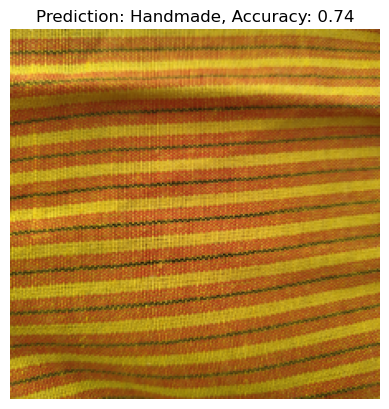

In [30]:
# Path to the image you want to predict
image_path = "C:/NewDataSet/dataset/test/HandMade/(3).jpg"

# Load the image
img = Image.open(image_path)
img = img.resize((img_width, img_height))  # Resize the image to match model input size

# Convert the image to a numpy array and preprocess it
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Rescale pixel values

# Get the model's prediction for the image
prediction = model.predict(img_array)

# Class 1 if prediction >= 0.5, otherwise class 0
predicted_class = 1 if prediction >= 0.5 else 0

# Calculate prediction accuracy
accuracy = prediction[0][0] if predicted_class == 1 else 1 - prediction[0][0]

# Display the image, prediction, and prediction accuracy
plt.imshow(img)
plt.axis('off')
plt.title(f"Prediction: {'Handmade' if predicted_class == 0 else 'Machine-made'}, Accuracy: {accuracy:.2f}")
plt.show()

1/1 [==============================] - 0s 78ms/step


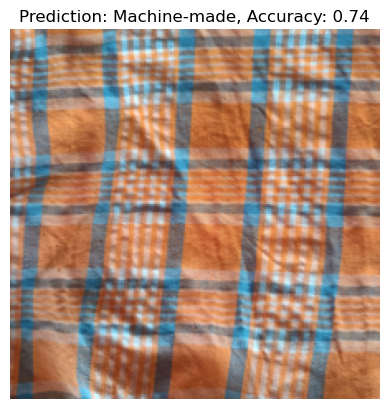

In [34]:
# Path to the image you want to predict
image_path = "C:/NewDataSet/dataset/test/MachineMade/(23).jpg"

# Load the image
img = Image.open(image_path)
img = img.resize((img_width, img_height))  # Resize the image to match model input size

# Convert the image to a numpy array and preprocess it
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Rescale pixel values

# Get the model's prediction for the image
prediction = model.predict(img_array)

# Class 1 if prediction >= 0.5, otherwise class 0
predicted_class = 1 if prediction >= 0.5 else 0

# Calculate prediction accuracy
accuracy = prediction[0][0] if predicted_class == 1 else 1 - prediction[0][0]

# Display the image, prediction, and prediction accuracy
plt.imshow(img)
plt.axis('off')
plt.title(f"Prediction: {'Handmade' if predicted_class == 1 else 'Machine-made'}, Accuracy: {accuracy:.2f}")
plt.show()